## Data Dictionary

| Feature | Description |
| --- | --- |
| N | Ratio of Nitrogen content in soil |
| P | Ratio of Phosphorous content in soil |
| K | Ratio of Potassium content in soil |
| temperature | temperature in degree Celsius |
| humidity | relative humidity in % |
| rainfall | rainfall in mm |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
# Read file
df = pd.read_csv("Crop_recommendation.csv")

# Pring first 5 rows of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.shape

(2200, 8)

- 2200 rows and 8 columns

In [4]:
# Making column names more readable

df.rename(columns={'N' : 'Nitrogen' , 'P' : 'Phosphorus' , 'K' : 'Potassium' } , inplace = True)
df.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Finding out null values in the dataset

df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
from scipy.stats import f_oneway

# Example for Nitrogen
crop_labels = df['label'].unique()
groups = [df[df['label'] == label]['rainfall'] for label in crop_labels]

anova_result = f_oneway(*groups)
print(f'ANOVA result for Nitrogen: p-value = {anova_result.pvalue}')

ANOVA result for Nitrogen: p-value = 0.0


- No Null values and duplicated values.

In [8]:
for col in list(df.columns):
    print(col + ':')
    print(df[col].unique())
    print()

Nitrogen:
[ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134]

Phosphorus:
[ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130 144 123 125 131 140 122 134 145 139 141 138 136 13

- All the values seem fine , no data entry mistakes

## Checking for class imbalance

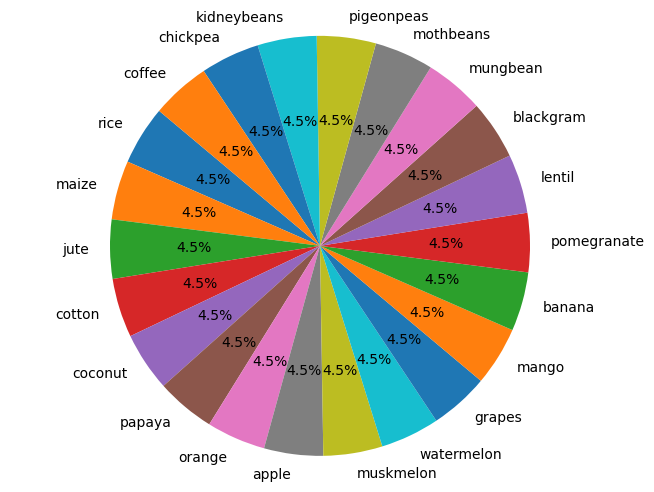

In [9]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### All classes are balanced , a fair prediction can be executed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


- Categorical object label will need to be encoded

In [11]:
df.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
# Descriptive statistics for each crop

crop_stats = pd.pivot_table(df, index='label', aggfunc= np.mean)
crop_stats


,Nitrogen,Phosphorus,Potassium,humidity,ph,rainfall,temperature
label,,,,,,,
apple,20.80,134.22,199.89,92.333383,5.929663,112.654779,22.630942
banana,100.23,82.01,50.05,80.358123,5.983893,104.626980,27.376798
blackgram,40.02,67.47,19.24,65.118426,7.133952,67.884151,29.973340
chickpea,40.09,67.79,79.92,16.860439,7.336957,80.058977,18.872847
coconut,21.98,16.93,30.59,94.844272,5.976562,175.686646,27.409892
coffee,101.20,28.74,29.94,58.869846,6.790308,158.066295,25.540477
cotton,117.77,46.24,19.56,79.843474,6.912675,80.398043,23.988958
grapes,23.18,132.53,200.11,81.875228,6.025937,69.611829,23.849575
jute,78.40,46.86,39.99,79.639864,6.732778,174.792798,24.958376


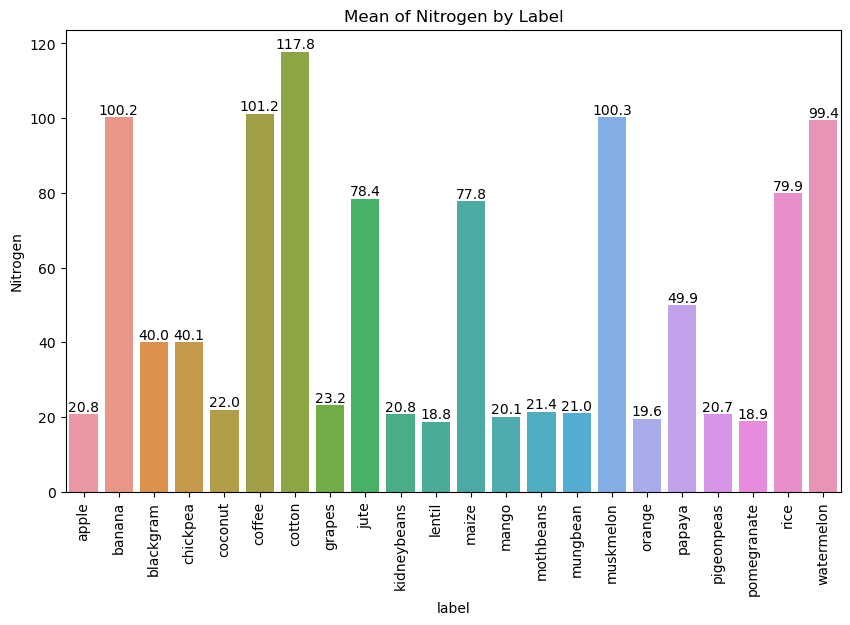

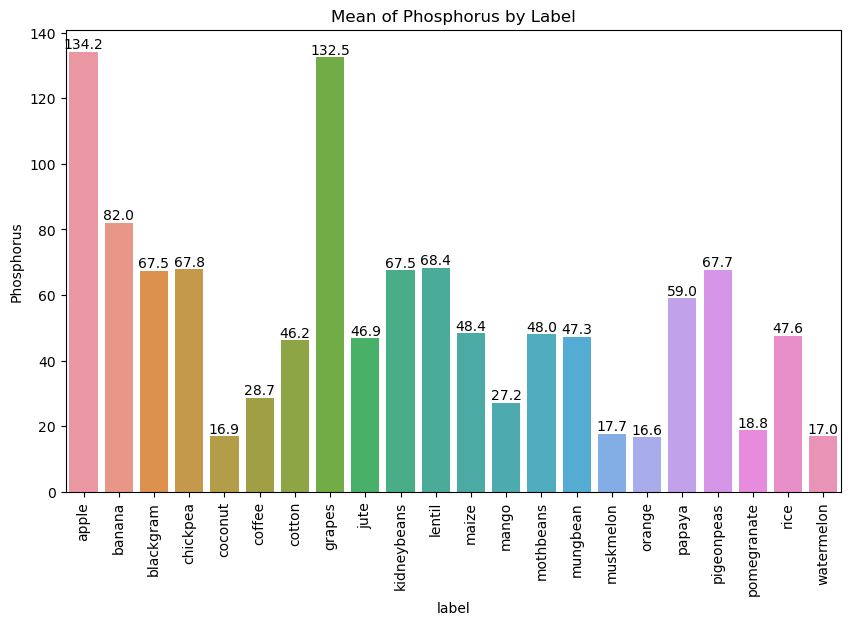

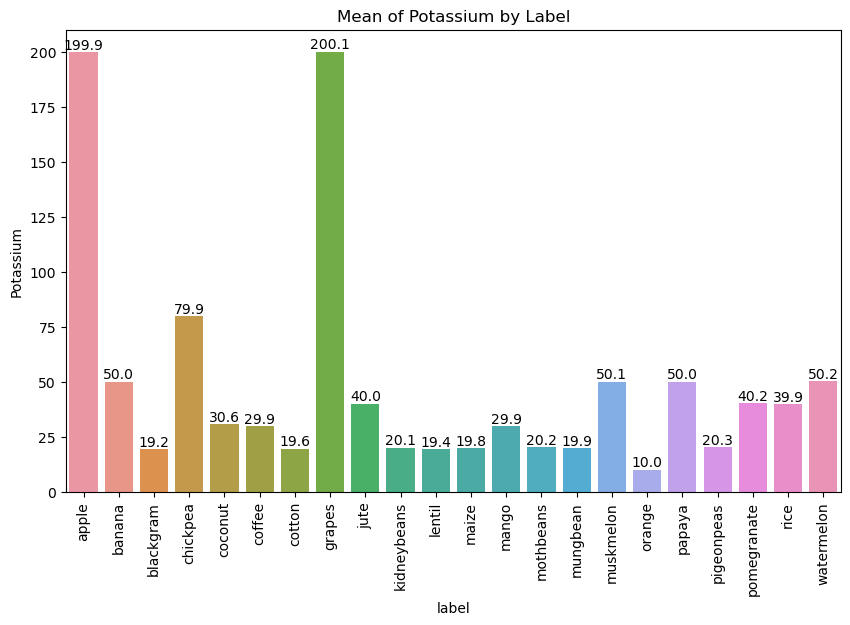

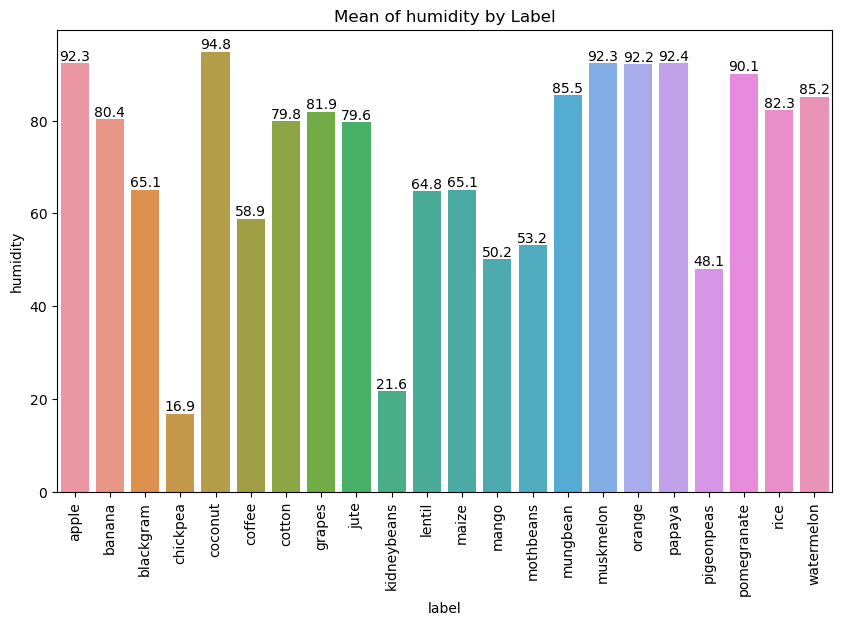

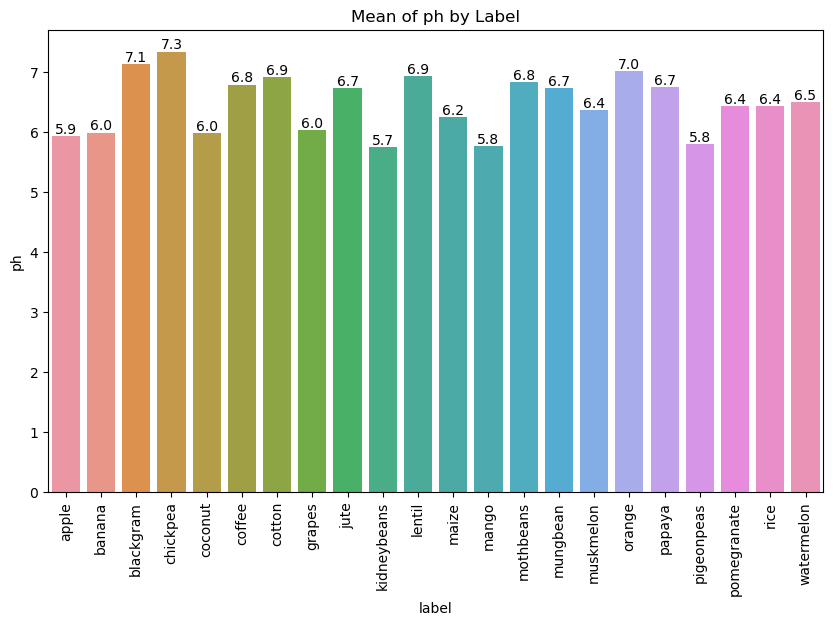

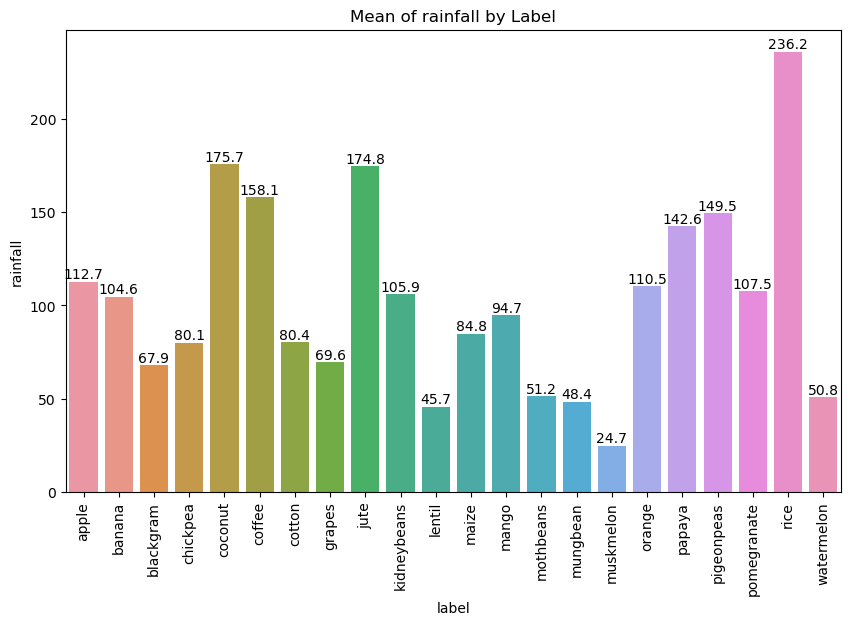

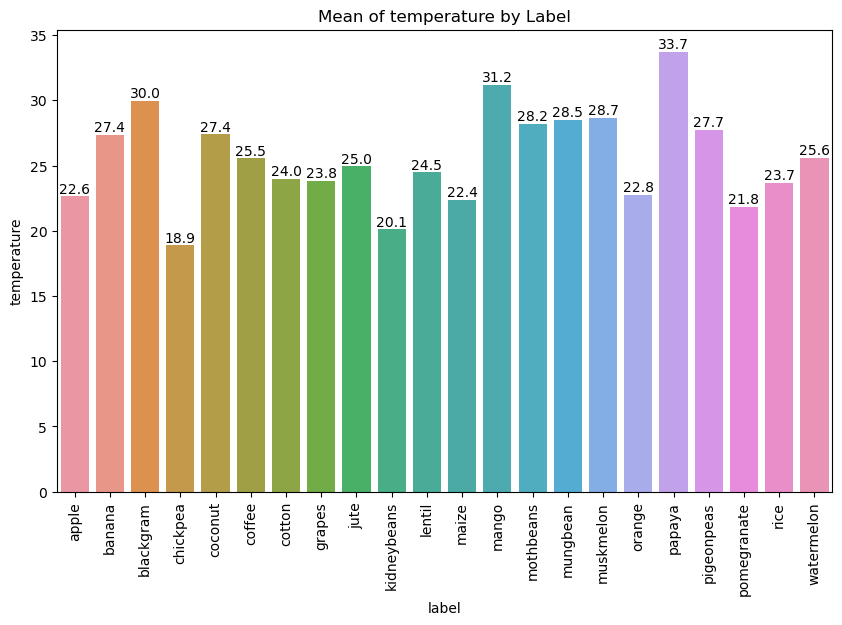

In [13]:
import plotly.express as px

# Loop through each column in crop_stats and create a bar plot with annotations
for col in crop_stats.columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    ax = sns.barplot(x=crop_stats.index, y=crop_stats[col])
    
    # Add annotations
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f')  # Format the label to show 2 decimal places

    plt.title(f'Mean of {col} by Label')
    plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
    plt.show()

## Correlation analysis

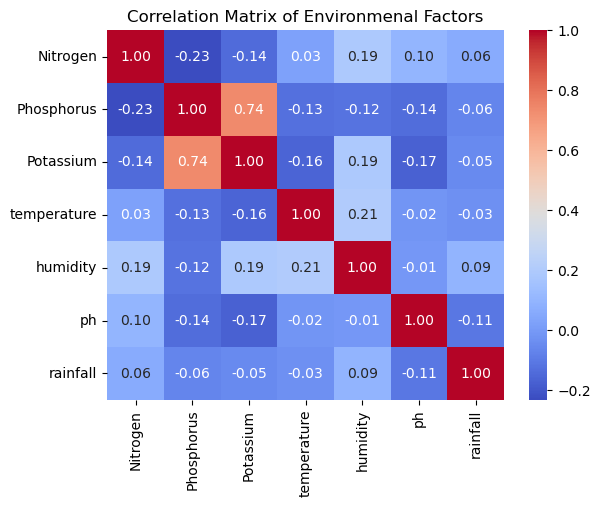

In [14]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[float, int])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Environmenal Factors')
plt.show()


## Ordinal Encoding

In [15]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
crop_dictionary = {
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee': 22
}

df['label'] = df['label'].map(crop_dictionary)
df.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

## Visualizations of Features

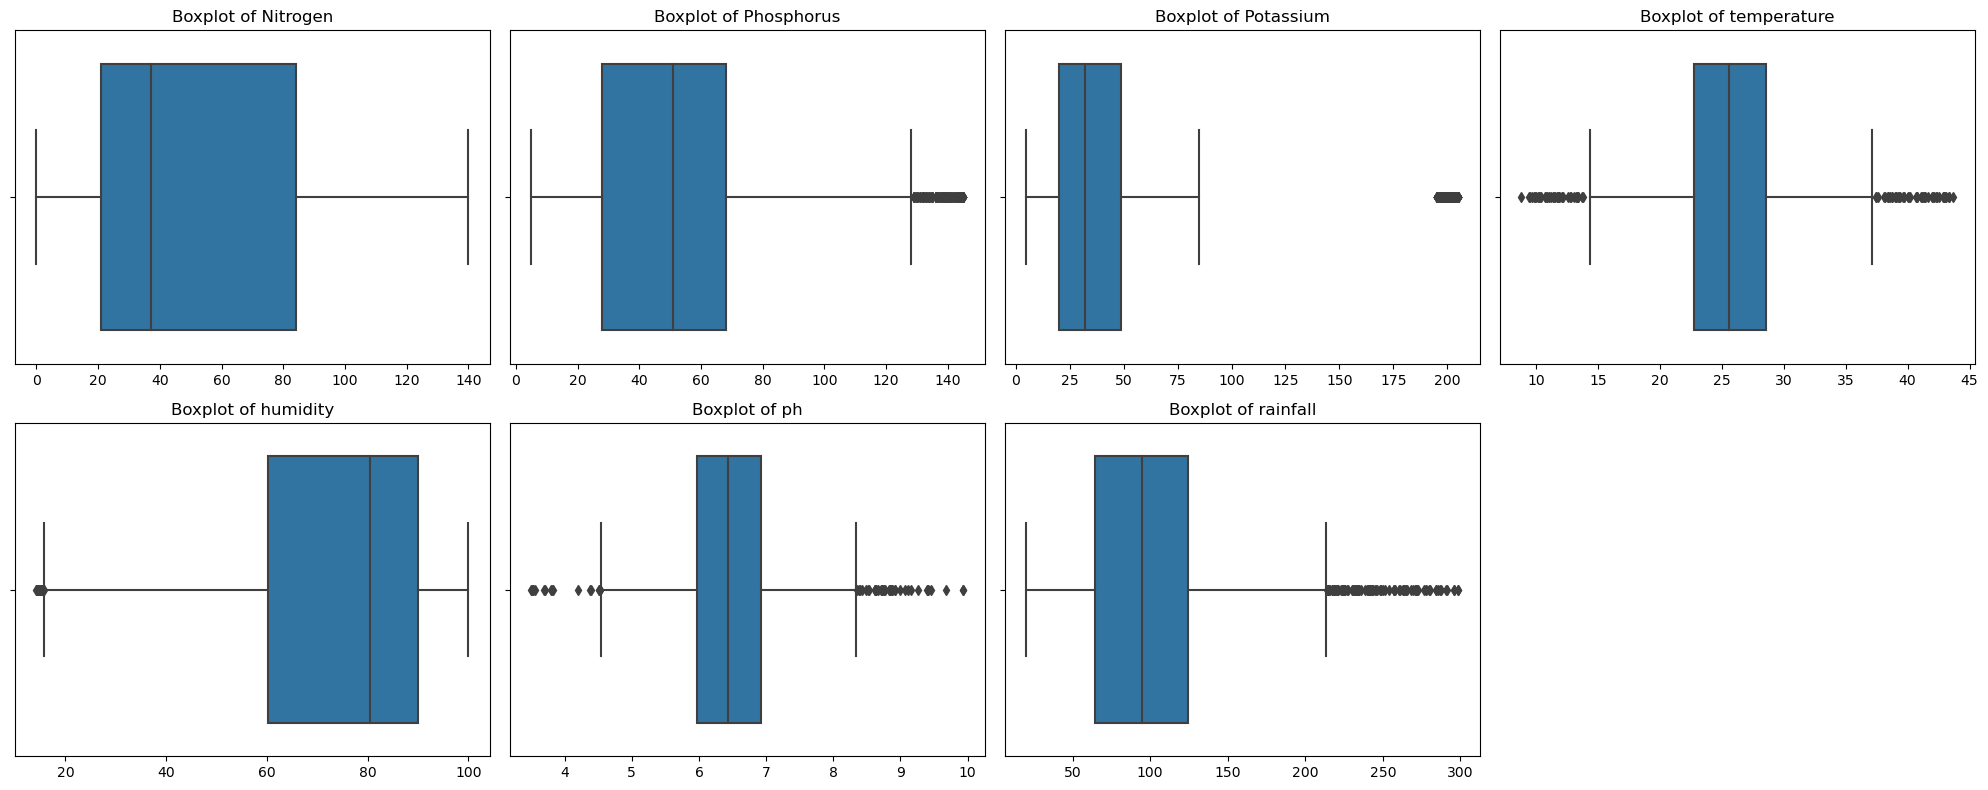

In [17]:

# Plot boxplots for each feature
plt.figure(figsize=(20, 8))

features = df.columns[:-1]  # Exclude the target column
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


- There is no outliers in Nitrogen
- However , outliers in this case is important because some crops do require excessive amounts of rainfall or an a very acidic soil 
- So , it is important to not remove those outliers 

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


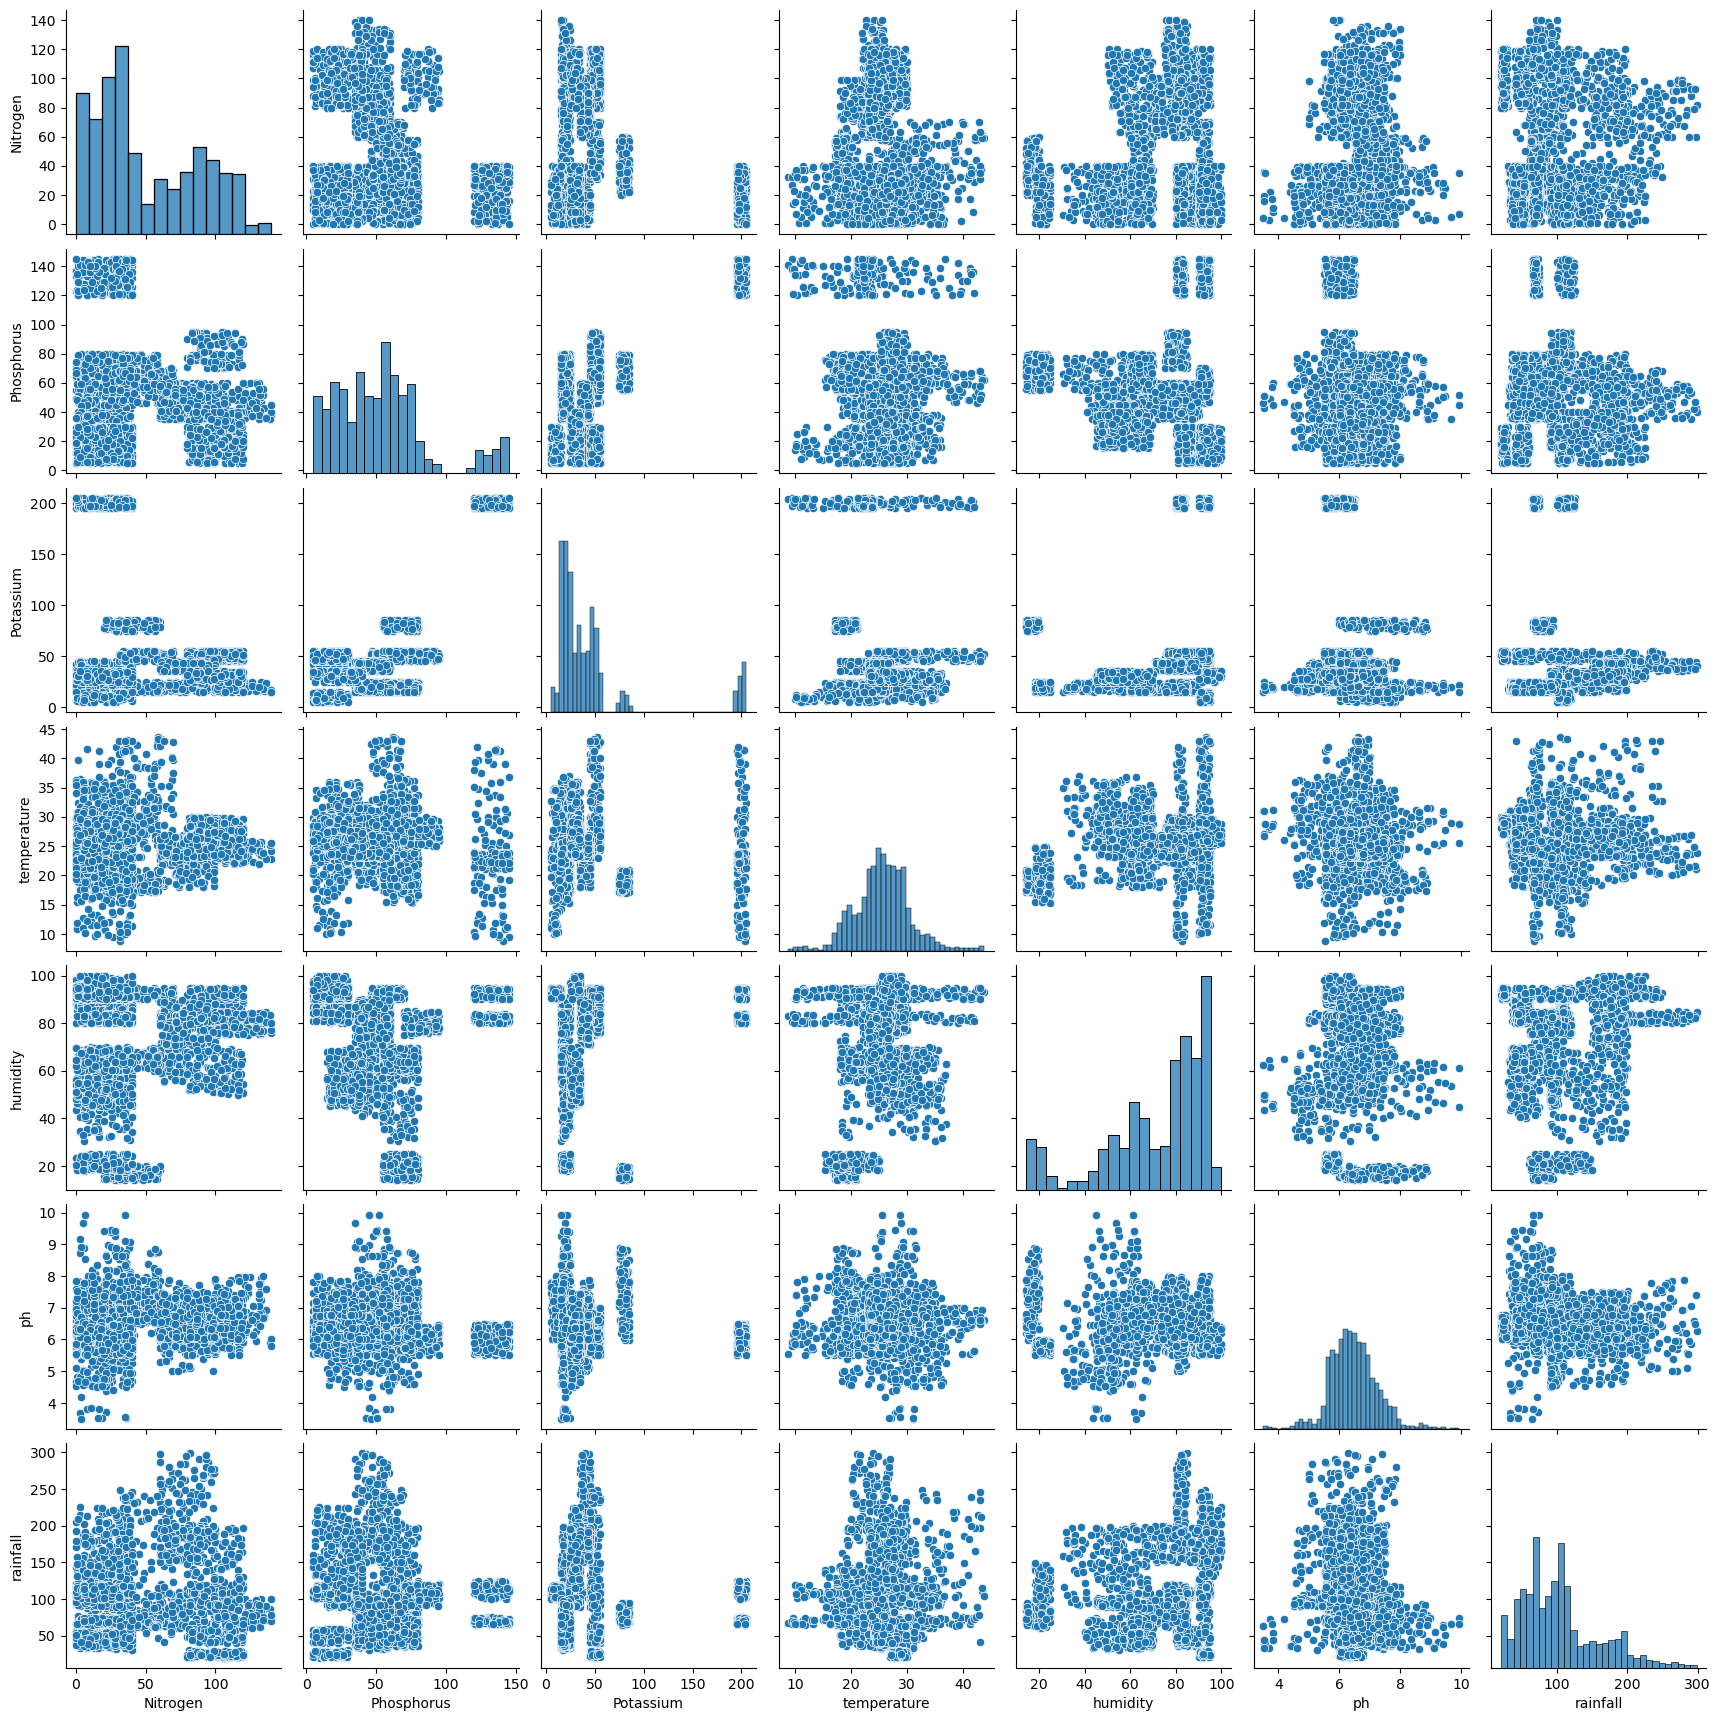

In [18]:
sns.pairplot(df, vars=['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity' , 'ph' , 'rainfall'])
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


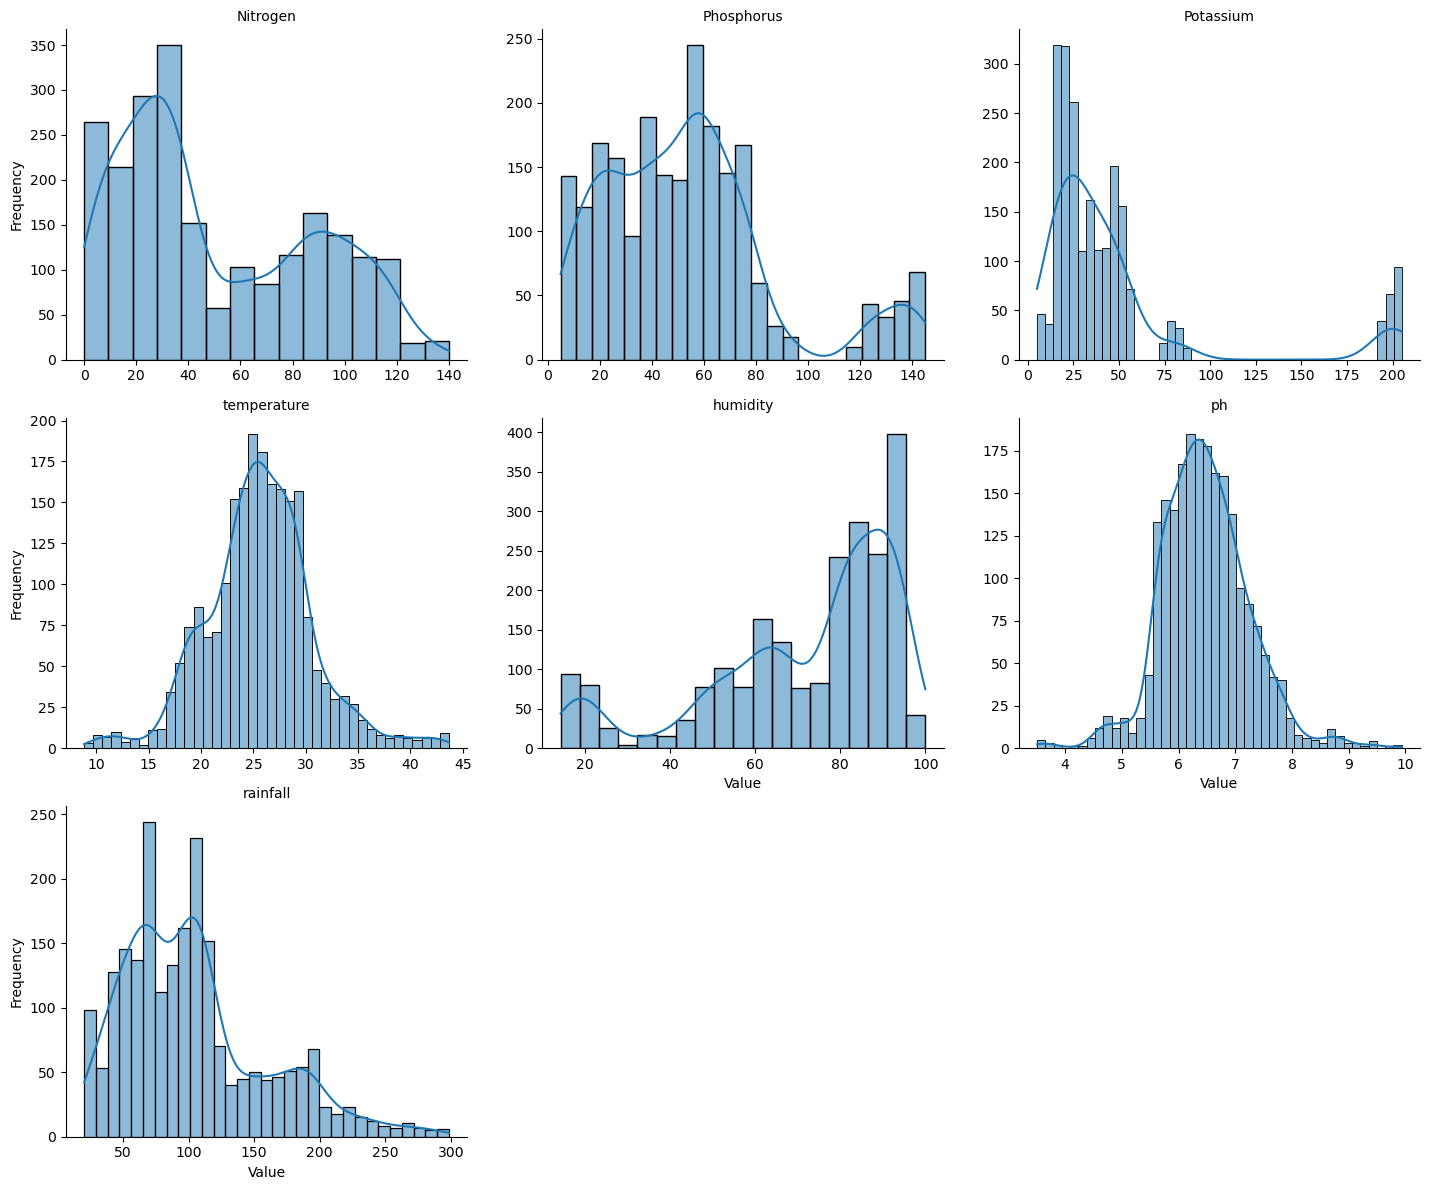

In [19]:
# Melt DataFrame to long format
df_melted = df.melt(id_vars=['label'], var_name='Feature', value_name='Value')

# Create FacetGrid
g = sns.FacetGrid(df_melted, col='Feature', col_wrap=3, height=4, aspect=1.2, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True)
g.set_titles("{col_name}")
g.set_axis_labels("Value", "Frequency")
plt.show()

<Axes: xlabel='Potassium', ylabel='Count'>

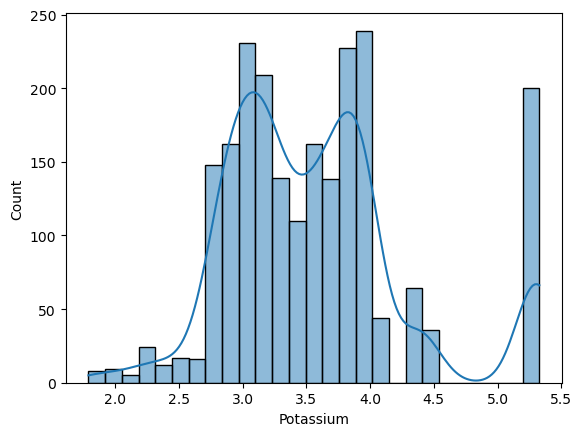

In [20]:
# In order to have normal distribution-like

df['Potassium'] = np.log1p(df['Potassium'])
sns.histplot(x="Potassium" , kde = True , data = df)

## Splitting the Dataset into Training and Test Sets

In [23]:


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop('label', axis=1)  # Features
y = df['label']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training features shape: (1760, 7)
Testing features shape: (440, 7)
Training target shape: (1760,)
Testing target shape: (440,)


In [24]:
# Converting it back to a dataframe because it is easier to work with the column names for the scaled features
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [26]:
## Model Training 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , make_scorer

models = {
    'Logistic Regression': LogisticRegression(),
    'K-nearest Neighbours' : KNeighborsClassifier(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier()
}


# Dictionary to store metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision' : [],
    'F1 Score': []
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    
    # Store metrics
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)
    
# Creating a Dataframe for metrics
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,F1 Score
0,Logistic Regression,0.963636,0.964442,0.963512
1,K-nearest Neighbours,0.968182,0.972465,0.968206
2,Decision Tree Classifier,0.981818,0.982331,0.981809
3,Random Forest Classifier,0.993182,0.993735,0.993175
4,Gradient Boosting Classifier,0.981818,0.984271,0.981851


- Random Forest is the best classifier

C:\Users\User\AppData\Local\Temp\ipykernel_24136\2422197181.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


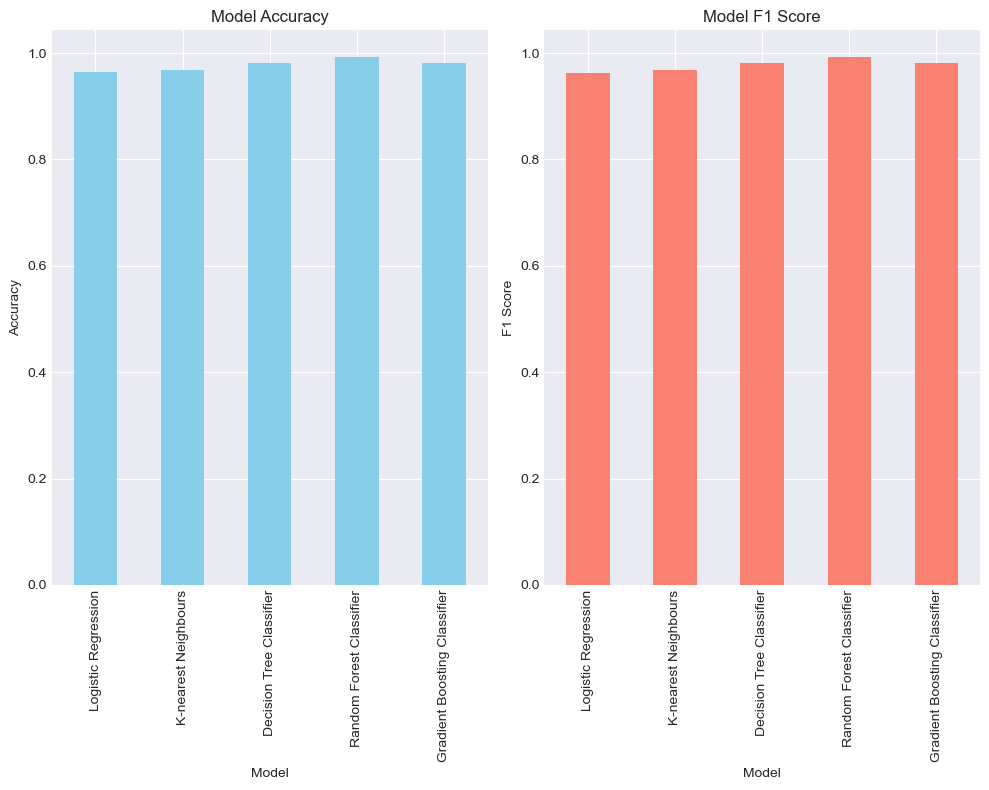

In [27]:
# Let's plot the accuracies and F1-score to determine the best model to perform customer churn 
plt.style.use('seaborn-darkgrid')

fig , ax = plt.subplots(1,2,figsize = (10,8))

# Plot Accuracy
metrics_df.plot(x='Model', y='Accuracy', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Model')

# Plot F1 Score
metrics_df.plot(x='Model', y='F1 Score', kind='bar', ax=ax[1], color='salmon', legend=False)
ax[1].set_title('Model F1 Score')
ax[1].set_ylabel('F1 Score')
ax[1].set_xlabel('Model')

plt.tight_layout()

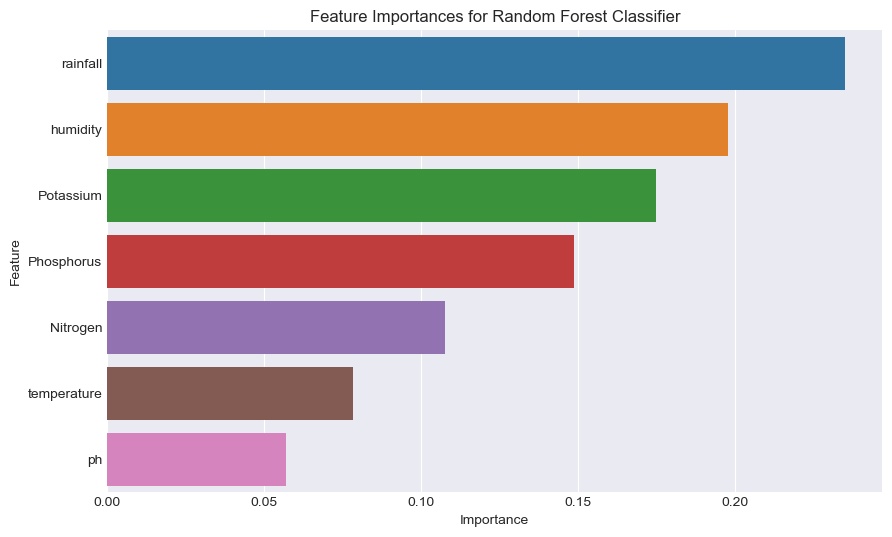

In [30]:
# Train Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances for Random Forest Classifier')
plt.show()
